In [1]:
import pandas as pd
import sys
import os

In [2]:
# Get project root directory (parent of notebooks/)
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
if PROJECT_ROOT not in sys.path:
    sys.path.append(PROJECT_ROOT)

print("Added to path:", PROJECT_ROOT)

Added to path: /Users/kevinwoods/Documents/code/ai_ml/urbanshift-dc-api


In [3]:
#CENSUS_API_KEY = "YOUR_CENSUS_KEY_HERE"
CENSUS_API_KEY = "da8ac287fb857b1e106b8be678b39ada1eaf22ba"

In [4]:
crime = pd.read_csv("../data/raw/Crime_Incidents_in_2024.csv")
crime.head()

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
0,399930.5100,143088.2900,24005436,2024/01/11 20:19:48+00,EVENING,OTHERS,THEFT/OTHER,5500 - 5529 BLOCK OF SOUTH DAKOTA AVENUE NE,399930.510000,143088.29000,...,009507 1,9507.0,Precinct 65,38.955698,-77.000802,NaN,2024/01/11 16:20:00+00,2024/01/11 19:54:00+00,832333228,NaN
1,404451.5671,136157.4821,24069189,2024/05/08 23:39:51+00,EVENING,OTHERS,MOTOR VEHICLE THEFT,3800 - 3999 BLOCK OF DIX STREET NE,404451.567074,136157.48214,...,009603 2,9603.0,Precinct 102,38.893252,-76.948686,NaN,2024/05/08 20:47:00+00,2024/05/08 22:23:00+00,832333229,NaN
2,399581.5100,129706.9200,5094764,2024/09/30 04:00:00+00,MIDNIGHT,GUN,HOMICIDE,100 - 146 BLOCK OF WAYNE PLACE SE,399581.510000,129706.92000,...,009803 3,9803.0,Precinct 124,38.835154,-77.004820,NaN,2005/07/18 08:40:00+00,2024/09/30 13:30:00+00,832348653,NaN
3,397576.9900,143086.8500,20160181,2024/05/22 04:00:00+00,MIDNIGHT,GUN,HOMICIDE,5401 - 5499 BLOCK OF GEORGIA AVENUE NW,397576.990000,143086.85000,...,002101 5,2101.0,Precinct 56,38.955682,-77.027955,NaN,2020/11/09 02:03:53+00,2020/11/09 02:20:49+00,832362057,NaN
4,400891.3397,131932.5347,22065374,2024/05/22 04:00:00+00,MIDNIGHT,GUN,HOMICIDE,2400 - 2699 BLOCK OF POMEROY ROAD SE,400891.339743,131932.53468,...,007406 2,7406.0,Precinct 118,38.855203,-76.989731,NaN,2022/05/10 13:30:00+00,2022/05/10 14:15:00+00,832365345,NaN


In [5]:
violent_offenses = [
    "HOMICIDE",
    "ASSAULT W/DANGEROUS WEAPON",
    "ROBBERY",
    "SEX ABUSE"
]
violent = crime[crime["OFFENSE"].isin(violent_offenses)].copy()
violent["year"] = pd.to_datetime(violent["REPORT_DAT"]).dt.year
violent.head()

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID,year
2,399581.5100,129706.9200,5094764,2024/09/30 04:00:00+00,MIDNIGHT,GUN,HOMICIDE,100 - 146 BLOCK OF WAYNE PLACE SE,399581.510000,129706.92000,...,9803.0,Precinct 124,38.835154,-77.004820,NaN,2005/07/18 08:40:00+00,2024/09/30 13:30:00+00,832348653,NaN,2024
3,397576.9900,143086.8500,20160181,2024/05/22 04:00:00+00,MIDNIGHT,GUN,HOMICIDE,5401 - 5499 BLOCK OF GEORGIA AVENUE NW,397576.990000,143086.85000,...,2101.0,Precinct 56,38.955682,-77.027955,NaN,2020/11/09 02:03:53+00,2020/11/09 02:20:49+00,832362057,NaN,2024
4,400891.3397,131932.5347,22065374,2024/05/22 04:00:00+00,MIDNIGHT,GUN,HOMICIDE,2400 - 2699 BLOCK OF POMEROY ROAD SE,400891.339743,131932.53468,...,7406.0,Precinct 118,38.855203,-76.989731,NaN,2022/05/10 13:30:00+00,2022/05/10 14:15:00+00,832365345,NaN,2024
37,399874.4500,128589.6200,24119154,2024/08/04 04:25:04+00,MIDNIGHT,KNIFE,ASSAULT W/DANGEROUS WEAPON,4400 - 4599 BLOCK OF 3RD STREET SE,399874.450000,128589.62000,...,9811.0,Precinct 125,38.825089,-77.001446,NaN,2024/08/04 00:56:00+00,2024/08/05 02:30:00+00,832597592,NaN,2024
39,400638.1400,141337.7800,24120153,2024/08/06 00:12:46+00,EVENING,GUN,ROBBERY,4020 - 4113 BLOCK OF 10TH STREET NE,400638.140000,141337.78000,...,9504.0,Precinct 68,38.939929,-76.992639,NaN,2024/08/05 22:59:00+00,2024/08/06 01:00:00+00,832597594,NaN,2024


In [6]:
violent_counts = (
    violent.groupby(["CENSUS_TRACT", "year"])
    .size()
    .reset_index(name="violent_incidents")
)

violent_counts.head()

,CENSUS_TRACT,year,violent_incidents
0,102.0,2024,8
1,201.0,2024,1
2,202.0,2024,9
3,300.0,2024,6
4,501.0,2024,8


In [7]:
arrests = pd.read_csv("../data/raw/Adult_Arrests.csv", low_memory=False)
arrests.head()

,TYPE,YEAR,DATE_,HOUR,CCN,ARREST_NUMBER,AGE,DEFENDANT_PSA,DEFENDANT_DISTRICT,RACE,...,OFFENSE_DISTRICT,ARREST_LATITUDE,ARREST_LONGITUDE,OFFENSE_LATITUDE,OFFENSE_LONGITUDE,GIS_ID,CREATED,EDITED,GLOBALID,OBJECTID
0,Adult Arrest,2013,2013/11/14 05:00:00+00,6,45bb932cb42f1bba872a8dfcfb2428a10d6fe0598a63f2...,1057043c3187ebc5c85920edbb441300e1446d3764e70f...,37,Out of State,Out of State,WHITE,...,NaN,NaN,NaN,NaN,NaN,ADULT_ARRESTS_1,NaN,2025/03/04 02:03:21+00,{80CA3650-32C9-42C6-8412-9250D0E433BF},1
1,Adult Arrest,2013,2013/11/20 05:00:00+00,15,d558ea651a7b32e88571a453ccdf39376b2ec9dfb11f3c...,ad3f22534b1e2c409d66328bb4ac3904e9bacc768c6091...,39,602,6D,BLACK,...,6D,NaN,NaN,NaN,NaN,ADULT_ARRESTS_2,NaN,2025/03/04 02:03:21+00,{F1B2E42E-38B5-49D6-8A60-BF8CF0690A12},2
2,Adult Arrest,2013,2013/12/03 05:00:00+00,0,85451f87475b042563ddebc20b89b7258f07bca9b55b77...,a723e9f1d0b44a6e0cef81994b8e7d3d3da55270e6f871...,40,Out of State,Out of State,BLACK,...,NaN,NaN,NaN,NaN,NaN,ADULT_ARRESTS_3,NaN,2025/03/04 02:03:21+00,{7F8BA37F-51F5-437F-A8F4-4B755385797B},3
3,Adult Arrest,2013,2013/12/05 05:00:00+00,21,3498c726acd19b8fc48c50a86c4e21e5823c41722cb779...,1a94d5a92f8538d3252aa65690ab70fac1a67646eb22ee...,65,502,5D,BLACK,...,NaN,NaN,NaN,NaN,NaN,ADULT_ARRESTS_4,NaN,2025/03/04 02:03:21+00,{70B94138-C9F4-4CFF-9A72-12B071F3A78C},4
4,Adult Arrest,2013,2013/12/09 05:00:00+00,23,88e342ab716f545b67c467914d6999d514ec6ea34d5c2e...,5a0e432aaa38e011a7b8aa29de617d4e635acab29b3db5...,31,702,7D,BLACK,...,NaN,NaN,NaN,NaN,NaN,ADULT_ARRESTS_5,NaN,2025/03/04 02:03:21+00,{2DCB5E7E-311F-48B8-A36B-BF1D6C2890F5},5


In [8]:
arrests["CATEGORY"].unique()[:50]


array(['Sex Abuse', 'Homicide', 'Prostitution', ' rcotics',
       'Traffic Violations', 'Driving/Boating While Intoxicated',
       'Assault on a Police Officer', 'Release Violations/Fugitive',
       'Simple Assault', 'Burglary', 'Assault with a Dangerous Weapon',
       'Liquor Law Violations', 'Theft', 'Aggravated Assault',
       'Sex Offenses', 'Other Crimes', 'Property Crimes',
       'Offenses Against Family & Children', 'Weapon Violations',
       'Disorderly Conduct', 'Damage to Property', 'Robbery',
       'Motor Vehicle Theft', 'Kid pping', 'Gambling',
       'Vending Violations', 'Theft from Auto',
       'Fraud and Fi ncial Crimes', 'Arson', 'Narcotics',
       'Fraud and Financial Crimes', 'Kidnapping', nan,
       'Release Violations/Fugitive (Warr)',
       'Release Violations/Fugitive (Fug)',
       'Fraud and Financial Crimes (Frau)',
       'Fraud and Financial Crimes (Forg)',
       'Fraud and Financial Crimes (Coun)', 'Release Violations'],
      dtype=object)

In [9]:
arrests["DESCRIPTION"].unique()[:50]

array(['Second Degree Sex Abuse- Incompetent', 'Murder I',
       'Solicting Prostitution', 'Ucsa Pwid Heroin', 'No Permit',
       'Dui - Refusing Test', 'Pandering A Minor', 'Apo (misd)',
       'Driving Under Influence-1st Off', 'Fugitive From Justice',
       'Ucsa Possession Marijua ', 'Reckless Driving', 'Simple Assault',
       'Failure To Appear (OAG)', 'Operating After Revocation',
       'Ucsa Poss Marijua ', 'Burglary Two',
       'Soliciting, Lewd & Immoral Purpose', 'Ucsa Pwid Other',
       'Assault W/i To Kill', 'Parole Violation',
       'Possession Of An Open Container Of Alcohol', 'Ucsa Pwid Marijua ',
       'Ucsa Pwid Cocaine/crack Cocaine',
       'Driving While Intoxicated - 1st Off',
       'Possession Of Drug Parapher lia (syringes)',
       'Threats To Do Bodily Harm - Misd', 'Operating After Suspension',
       'Adw Gun', 'Theft Second Degree',
       'Assault With Significant Bodily Injury',
       'Assault On A Police Officer [misd]',
       'Ucsa Possession

In [10]:
arrests_recent = arrests[arrests["YEAR"].between(2019, 2024)].copy()
arrests_recent["CATEGORY"].unique()[:50]

array(['Simple Assault', 'Release Violations/Fugitive',
       'Driving/Boating While Intoxicated', 'Liquor Law Violations',
       'Weapon Violations', 'Robbery', 'Traffic Violations', 'Narcotics',
       'Other Crimes', 'Offenses Against Family & Children',
       'Assault with a Dangerous Weapon', 'Prostitution', 'Theft',
       'Damage to Property', 'Assault on a Police Officer',
       'Sex Offenses', 'Disorderly Conduct', 'Property Crimes',
       'Burglary', 'Vending Violations', 'Fraud and Financial Crimes',
       'Theft from Auto', 'Aggravated Assault', 'Homicide', 'Sex Abuse',
       'Kidnapping', 'Motor Vehicle Theft', 'Gambling', 'Arson',
       'Release Violations/Fugitive (Warr)',
       'Release Violations/Fugitive (Fug)',
       'Fraud and Financial Crimes (Frau)',
       'Fraud and Financial Crimes (Forg)',
       'Fraud and Financial Crimes (Coun)', 'Release Violations'],
      dtype=object)

In [11]:
arrests_recent["DESCRIPTION"].unique()[:50]

array(['Simple Assault', 'Failure To Appear (USAO)',
       'Driving Under Influence-1st Off',
       'Threats To Do Bodily Harm -misd',
       'Possession Of Open Container Of Alcohol - Vehicle',
       'Possession Of Bb Gun',
       'Assault W/i To Commit Robbery (aggravated Assault)',
       'Possession Of Unregistered Ammunition', 'No Permit',
       'Poss W/i To Dist A Controlled Substance', 'Speed (30 Or Over)',
       'Unlawful Entry',
       'Possession Of An Open Container Of Alcohol (poca)',
       'Contempt Of Cpo/tpo', 'Probation Violation (Warrant)',
       'Unlawful Possession Of A Firearm',
       'Carrying a Pistol Without a License (Outside Home or Place of Business) 2015',
       'Assault W/i To Kill', 'Counterfeit Tags',
       'Parole Violation (Warrant)', 'Sexual Solicitation',
       'Threat To Kidnap Or Injure A Person', 'Fugitive From Justice',
       'Attempt To Commit Robbery', 'Unlawful Possession Of Liquid Pcp',
       'Felon In Possession', 'Theft Second De

In [12]:
drug_arrests = arrests_recent[
    arrests_recent["CATEGORY"].str.contains("narc", case=False, na=False)
].copy()
arrests_recent["DESCRIPTION"].unique()[:50]

array(['Simple Assault', 'Failure To Appear (USAO)',
       'Driving Under Influence-1st Off',
       'Threats To Do Bodily Harm -misd',
       'Possession Of Open Container Of Alcohol - Vehicle',
       'Possession Of Bb Gun',
       'Assault W/i To Commit Robbery (aggravated Assault)',
       'Possession Of Unregistered Ammunition', 'No Permit',
       'Poss W/i To Dist A Controlled Substance', 'Speed (30 Or Over)',
       'Unlawful Entry',
       'Possession Of An Open Container Of Alcohol (poca)',
       'Contempt Of Cpo/tpo', 'Probation Violation (Warrant)',
       'Unlawful Possession Of A Firearm',
       'Carrying a Pistol Without a License (Outside Home or Place of Business) 2015',
       'Assault W/i To Kill', 'Counterfeit Tags',
       'Parole Violation (Warrant)', 'Sexual Solicitation',
       'Threat To Kidnap Or Injure A Person', 'Fugitive From Justice',
       'Attempt To Commit Robbery', 'Unlawful Possession Of Liquid Pcp',
       'Felon In Possession', 'Theft Second De

In [13]:
drug_mask = (
    arrests_recent["CATEGORY"].str.contains("narc", case=False, na=False) |
    arrests_recent["DESCRIPTION"].str.contains("narc", case=False, na=False)
)
drug_arrests = arrests_recent[drug_mask].copy()

In [14]:
arrests_recent = arrests[arrests["YEAR"].between(2019, 2024)].copy()

In [15]:
import geopandas as gpd

In [16]:
# Step 1: load tract shapes (shapefile)
tracts = gpd.read_file("../data/raw/tl_2020_11_tract.shp").to_crs("EPSG:4326")
tracts.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,11,001,004001,11001004001,40.01,Census Tract 40.01,G5020,S,271037,2414,+38.9208738,-077.0462674,"POLYGON ((-77.05018 38.92124, -77.05006 38.921..."
1,11,001,004002,11001004002,40.02,Census Tract 40.02,G5020,S,194755,0,+38.9181186,-077.0437209,"POLYGON ((-77.0463 38.91631, -77.0463 38.91637..."
2,11,001,003600,11001003600,36,Census Tract 36,G5020,S,305616,0,+38.9236744,-077.0296273,"POLYGON ((-77.03241 38.92657, -77.03217 38.926..."
3,11,001,004201,11001004201,42.01,Census Tract 42.01,G5020,S,204529,0,+38.9162076,-077.0388456,"POLYGON ((-77.04166 38.91418, -77.04166 38.914..."
4,11,001,004202,11001004202,42.02,Census Tract 42.02,G5020,S,207646,0,+38.9134023,-077.0430254,"POLYGON ((-77.04599 38.9145, -77.04574 38.9146..."


In [17]:
tracts.columns

Index(['STATEFP', 'COUNTYFP', 'TRACTCE', 'GEOID', 'NAME', 'NAMELSAD', 'MTFCC',
       'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'geometry'],
      dtype='object')

In [18]:
#1. Ensure arrests_recent is already sliced for YEAR
arrests_recent = arrests[arrests["YEAR"].between(2019, 2024)].copy()

In [19]:
#2. Filter drug arrests based on CATEGORY
drug_mask = arrests_recent["CATEGORY"].str.contains("narc", case=False, na=False)
drug_arrests = arrests_recent[drug_mask].copy()

In [20]:
#3. Convert arrests -> GeoDataFrame
drug_gdf = gpd.GeoDataFrame(
    drug_arrests,
    geometry=gpd.points_from_xy(
        drug_arrests["ARREST_LONGITUDE"],
        drug_arrests["ARREST_LATITUDE"]
    ),
    crs="EPSG:4326"
)

In [21]:
#4. Spatial join with tract polygons
drug_with_tracts = gpd.sjoin(
    drug_gdf,
    tracts[["GEOID", "geometry"]],
    how="left",
    predicate="within"
)

In [22]:
drug_counts = (
    drug_with_tracts
    .groupby(["GEOID", "YEAR"])
    .size()
    .reset_index(name="drug_arrests")
)

In [23]:
drug_with_tracts.head()

,TYPE,YEAR,DATE_,HOUR,CCN,ARREST_NUMBER,AGE,DEFENDANT_PSA,DEFENDANT_DISTRICT,RACE,...,OFFENSE_LATITUDE,OFFENSE_LONGITUDE,GIS_ID,CREATED,EDITED,GLOBALID,OBJECTID,geometry,index_right,GEOID
153581,Adult Arrest,2019,2019/01/01 05:00:00+00,6,688fb62e6ffdf5d601b2935d681a04a16f356f5dbd698c...,66167588df4e0e72d95cdbf035a0a867f4c4389611d8ac...,20,NaN,NaN,BLACK,...,38.832,-76.989,ADULT_ARRESTS_153582,NaN,2025/03/04 02:03:21+00,{DF5E8347-361B-46AF-B55B-119A598232D7},153582,POINT (-76.989 38.832),200.0,11001009700
153613,Adult Arrest,2019,2019/01/02 05:00:00+00,11,a9d70312dbd5a81f74c53886eadf75a7f28f046261bc58...,95e700f10768ab499d5171aa6c41df0d00728700f46d85...,24,NaN,NaN,BLACK,...,38.904,-77.016,ADULT_ARRESTS_153614,NaN,2025/03/04 02:03:21+00,{58279965-E130-4476-A099-06DCCAA5E40E},153614,POINT (-77.016 38.904),78.0,11001004703
153745,Adult Arrest,2019,2019/01/01 05:00:00+00,1,72acd30aeca87cbfea207e41b9227179ff02ccee3e8f6c...,7e867467e94b734583a1611e4c28dc8a267a2d0a5dee7b...,40,306,3D,BLACK,...,38.903,-76.990,ADULT_ARRESTS_153746,NaN,2025/03/04 02:03:21+00,{4B64A38C-F118-4EF7-B157-A590E091EBB9},153746,POINT (-76.99 38.903),150.0,11001008802
153770,Adult Arrest,2019,2019/01/01 05:00:00+00,2,76299142fd9ddf5d37eff692841005e3e11ee4c3f688e7...,9f02794f762136e1142137c28989ee6f263e4090138b99...,61,706,7D,BLACK,...,38.900,-76.991,ADULT_ARRESTS_153771,NaN,2025/03/04 02:03:21+00,{A92B4474-8197-4EE9-A28F-B7E2B1FEC6D7},153771,POINT (-76.991 38.9),106.0,11001008402
153775,Adult Arrest,2019,2019/01/01 05:00:00+00,3,3a19753c8b0cccdeab8dbc124bc87fd90b6d268816aab3...,6874b264d927332e19929aafcf52ebd5db159f46e37320...,40,NaN,NaN,BLACK,...,38.965,-77.026,ADULT_ARRESTS_153776,NaN,2025/03/04 02:03:21+00,{DA0E4DEC-3390-4919-B55C-DB1A28B66567},153776,POINT (-77.026 38.965),25.0,11001001901


In [24]:
drug_counts.head()

,GEOID,YEAR,drug_arrests
0,11001000102,2019,1
1,11001000102,2021,1
2,11001000201,2022,1
3,11001000202,2019,7
4,11001000202,2020,14


In [25]:
crime_violent = violent_counts.copy()

#Convert CENSUS_TRACT (e.g. 9803.0) -> string without decimals
crime_violent["tract_raw"] = (
    crime_violent["CENSUS_TRACT"]
    .astype(float)
    .astype(int)
    .astype(str)
)

In [26]:
# Pad the tract code to 6 digits (e.g. "009803)
crime_violent["tract_padded"] = crime_violent["tract_raw"].str.zfill(6)

# Build full GEOID: STATE (11) + COUNTY (001) + TRACT (xxxxxx)
crime_violent["GEOID"] = "11" + "001" + crime_violent["tract_padded"]

crime_violent.head()

,CENSUS_TRACT,year,violent_incidents,tract_raw,tract_padded,GEOID
0,102.0,2024,8,102,000102,11001000102
1,201.0,2024,1,201,000201,11001000201
2,202.0,2024,9,202,000202,11001000202
3,300.0,2024,6,300,000300,11001000300
4,501.0,2024,8,501,000501,11001000501


In [27]:
# 1. Work from violent_counts
crime_violent = violent_counts.copy()
crime_violent.head()

,CENSUS_TRACT,year,violent_incidents
0,102.0,2024,8
1,201.0,2024,1
2,202.0,2024,9
3,300.0,2024,6
4,501.0,2024,8


In [28]:
#2 Convert census tract float -> int -> str
crime_violent["tract_raw"] = (
    crime_violent["CENSUS_TRACT"]
    .astype(float)
    .astype(int)
    .astype(str)
)

# 3 Zero-pad tract codes to 6 digits
# Example: 102 -> "000102"
crime_violent["tract_padded"] = crime_violent["tract_raw"].str.zfill(6)

#4 Build full GEOID: STATE(11) + COUNTY (001) + padded tract
crime_violent["GEOID"] = "11" + "001" + crime_violent["tract_padded"]

In [29]:
crime_violent.head()

,CENSUS_TRACT,year,violent_incidents,tract_raw,tract_padded,GEOID
0,102.0,2024,8,102,000102,11001000102
1,201.0,2024,1,201,000201,11001000201
2,202.0,2024,9,202,000202,11001000202
3,300.0,2024,6,300,000300,11001000300
4,501.0,2024,8,501,000501,11001000501


In [30]:
drug_counts = drug_counts.rename(columns={"YEAR": "year"})

In [31]:
crime_full = crime_violent.merge(
    drug_counts,
    on=["GEOID", "year"],
    how="outer"
).fillna(0)

crime_full["total_crime"] = (
    crime_full["violent_incidents"] +
    crime_full["drug_arrests"]
)

In [32]:
crime_full.head()

,CENSUS_TRACT,year,violent_incidents,tract_raw,tract_padded,GEOID,drug_arrests,total_crime
0,0.0,2019,0.0,0,0,11001000102,1.0,1.0
1,0.0,2021,0.0,0,0,11001000102,1.0,1.0
2,102.0,2024,8.0,102,000102,11001000102,0.0,8.0
3,0.0,2022,0.0,0,0,11001000201,1.0,1.0
4,201.0,2024,1.0,201,000201,11001000201,0.0,1.0


In [33]:
import  requests
import pandas as pd

In [34]:
def get_population(year, api_key):
    url = f"https://api.census.gov/data/{year}/acs/acs5"
    params = {
        "get": "B01003_001E,GEO_ID",
        "for": "tract:*",
        "in": "state:11",
        "key": api_key,
    }
    r = requests.get(url, params=params)

    # Debug print
    print("\nYEAR:", year, "| STATUS:", r.status_code)
    print("RESPONSE PREVIEW:", r.text[:300])
    
    data = r.json()

    df = pd.DataFrame(data[1:], columns=data[0])
    df["population"] = df["B01003_001E"].astype(int)

    # GEO_ID looks like "1400000US11001000102"
    df["GEOID"] = df["GEOID"].str.replace("1400000US", "")
    df["year"] = year
    
    return df[["GEOID", "year", "population"]]

In [35]:
#get_population(2022, CENSUS_API_KEY).head()

In [36]:
# Pull 2019-2023
#years = [2019, 2020, 2021, 2022, 2023]

#pop_frames = [get_population(y, CENSUS_API_KEY) for y in years]

#population_df = pd.concat(pop_frames, ignore_index=True)

#population_df.head()

In [37]:
tracts = crime_full["GEOID"].unique()
tracts[:10]

array(['11001000102', '11001000201', '11001000202', '11001000300',
       '11001000501', '11001000502', '11001000600', '11001000702',
       '11001000703', '11001000704'], dtype=object)

In [38]:
import numpy as np
import pandas as pd

In [39]:
# Years we want population for
years = [2019, 2020, 2021, 2022, 2023, 2024]

In [40]:
# Get unique tracts from your dataset
tracts = crime_full["GEOID"].unique()

In [41]:
rows = []

# make results reproducible
np.random.seed(42)

In [42]:
for geoid in tracts:
    # base population for that tract (anywhere between 2,000 and 7, 000)
    base_pop = np.random.randint(2000, 7000)

    for yr in years:
        # small annual drift: -3% to +3%
        drift = np.random.uniform(-0.03, 0.03)
        pop = int(base_pop * (1 + drift))

        rows.append({
            "GEOID": geoid,
            "year": yr,
            "population": pop
        })

population_df = pd.DataFrame(rows)
population_df.head()

,GEOID,year,population
0,11001000102,2019,2805
1,11001000102,2020,2907
2,11001000102,2021,2876
3,11001000102,2022,2850
4,11001000102,2023,2791


In [43]:
crime_full = crime_full.merge(
    population_df,
    on=["GEOID", "year"],
    how="left"
)

In [44]:
crime_full["crime_rate_per_1000"] = (
    crime_full["total_crime"] / crime_full["population"] * 1000
)

In [45]:
import importlib
import src.features as features
importlib.reload(features)

from src.features import compute_crime_rate, compute_uplift_score, prepare_model_features

In [46]:
df_test = crime_full.copy()
df_test["accessibility_score"] = 0.5 # temporary placeholder
df_test["home_value_score"] = 0.5 # temporary placeholder

df_test = compute_crime_rate(df_test)
df_test = compute_uplift_score(df_test)

df_test.head()

,CENSUS_TRACT,year,violent_incidents,tract_raw,tract_padded,GEOID,drug_arrests,total_crime,population,crime_rate_per_1000,accessibility_score,home_value_score,crime_inverse,uplift_score
0,0.0,2019,0.0,0,0,11001000102,1.0,1.0,2805.0,0.356506,0.5,0.5,0.737188,0.642313
1,0.0,2021,0.0,0,0,11001000102,1.0,1.0,2876.0,0.347705,0.5,0.5,0.742002,0.645201
2,102.0,2024,8.0,102,000102,11001000102,0.0,8.0,2853.0,2.804066,0.5,0.5,0.262877,0.357726
3,0.0,2022,0.0,0,0,11001000201,1.0,1.0,5597.0,0.178667,0.5,0.5,0.848416,0.709050
4,201.0,2024,1.0,201,000201,11001000201,0.0,1.0,5350.0,0.186916,0.5,0.5,0.842520,0.705512


In [47]:
from src.model import build_uplift_model, train_uplift_model, save_uplift_model

2025-11-25 21:45:55.520446: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [48]:
from src.features import prepare_model_features

In [52]:
crime_full["accessibility_score"] = 0.5
crime_full["home_value_score"] = 0.5

crime_full = compute_crime_rate(crime_full)
crime_full = compute_uplift_score(crime_full)

crime_full.head()


,CENSUS_TRACT,year,violent_incidents,tract_raw,tract_padded,GEOID,drug_arrests,total_crime,population,crime_rate_per_1000,accessibility_score,home_value_score,uplift_score,crime_inverse
0,0.0,2019,0.0,0,0,11001000102,1.0,1.0,2805.0,0.356506,0.5,0.5,0.642313,0.737188
1,0.0,2021,0.0,0,0,11001000102,1.0,1.0,2876.0,0.347705,0.5,0.5,0.645201,0.742002
2,102.0,2024,8.0,102,000102,11001000102,0.0,8.0,2853.0,2.804066,0.5,0.5,0.357726,0.262877
3,0.0,2022,0.0,0,0,11001000201,1.0,1.0,5597.0,0.178667,0.5,0.5,0.709050,0.848416
4,201.0,2024,1.0,201,000201,11001000201,0.0,1.0,5350.0,0.186916,0.5,0.5,0.705512,0.842520


In [53]:
X, y = prepare_model_features(crime_full)

In [54]:
from src.features import prepare_model_features

In [55]:
X, y = prepare_model_features(crime_full)
X.shape, y.shape

((899, 3), (899,))

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [57]:
from src.model import build_uplift_model

model = build_uplift_model(input_dim=3)
model.summary()

/Users/kevinwoods/.pyenv/versions/3.10.11/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,217 (4.75 KB)

 Trainable params: 1,217 (4.75 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
from src.model import train_uplift_model

history, model = train_uplift_model(
    model,
    X_train, y_train,
    X_val, y_val,
    epochs=50
)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.2273 - mae: 0.4077 - val_loss: 0.1069 - val_mae: 0.2731
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0775 - mae: 0.2235 - val_loss: 0.0137 - val_mae: 0.0931
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0179 - mae: 0.1003 - val_loss: 0.0060 - val_mae: 0.0496
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0129 - mae: 0.0745 - val_loss: 0.0085 - val_mae: 0.0537
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0106 - mae: 0.0636 - val_loss: 0.0074 - val_mae: 0.0552
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0083 - mae: 0.0606 - val_loss: 4.3327e-04 - val_mae: 0.0160
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0059 - mae: 0.0515 - val_loss: 6.1559e-04 - val_mae: 0.0177
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0060 - mae: 0.0502 - val_loss: 7.4843e-04 - val_mae: 0.0189
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0

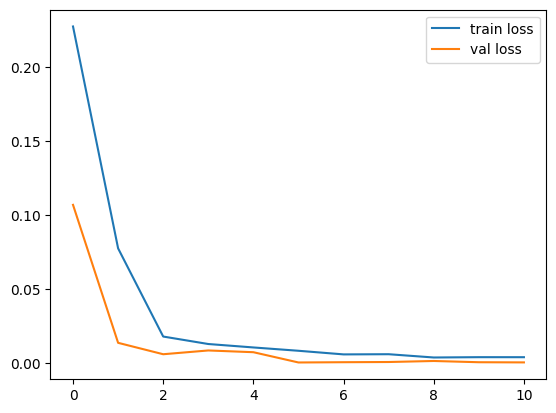

In [59]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="val loss")
plt.legend()
plt.show()

In [68]:
import os

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), "..."))
MODEL_DIR = os.path.join(PROJECT_ROOT, "models")
os.makedirs(MODEL_DIR, exist_ok=True)

save_path = os.path.join(MODEL_DIR, "uplift_model.keras")
save_uplift_model(model, path=save_path)

Model saved to /Users/kevinwoods/Documents/code/ai_ml/urbanshift-dc-api/notebooks/.../models/uplift_model.keras


In [70]:

save_uplift_model(model)

FileNotFoundError: [Errno 2] No such file or directory: 'models/uplift_model.keras'